# Combining weather data and ratings data

In [1]:
import pandas as pd

# Load the two CSV files
weather_df = pd.read_csv('weather_data_final')
ratings_df = pd.read_csv('ratings_final')

# Convert both date columns to datetime format to ensure they match during merging
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'], format='%Y-%m-%d')
ratings_df['Date'] = pd.to_datetime(ratings_df['Date'], format='%Y-%m-%d')

# Perform a left join to keep all ratings even if there are duplicates for a single date
merged_df = pd.merge(ratings_df, weather_df, left_on='Date', right_on='timestamp', how='left')

# Drop the redundant 'Date' column after merging
merged_df = merged_df.drop(columns=['Date'])

# Sort the DataFrame by date, with the newest dates at the top
merged_df = merged_df.sort_values(by='timestamp', ascending=False).reset_index(drop=True)

# Drop missing values
merged_df = merged_df.dropna()

# Sort the DataFrame by date, with the newest dates at the top
merged_df = merged_df.sort_values(by='timestamp', ascending=False).reset_index(drop=True)

merged_df.to_csv('data_final', index=False)

merged_df

,Rating,timestamp,station,temp_dry,precip_dur_past10min,sun_last10min_glob
0,5,2024-08-20,6116.0,22.8,0.0,364.0
1,5,2024-08-19,6116.0,19.9,0.0,584.0
2,5,2024-08-19,6116.0,19.9,0.0,584.0
3,1,2024-08-19,6116.0,19.9,0.0,584.0
4,5,2024-08-19,6116.0,19.9,0.0,584.0
...,...,...,...,...,...,...
3106,3,2021-01-30,6116.0,-0.7,0.0,443.0
3107,5,2021-01-18,6116.0,3.1,72.0,0.0
3108,5,2021-01-04,6116.0,2.2,0.0,148.0
3109,5,2021-01-02,6116.0,1.3,0.0,0.0


# Descriptive statistics of weather data

In [2]:
# Selecting the relevant columns
relevant_columns = ['temp_dry', 'precip_dur_past10min', 'sun_last10min_glob']

# Generating descriptive statistics
descriptive_stats = merged_df[relevant_columns].describe()

# Displaying the result
descriptive_stats

,temp_dry,precip_dur_past10min,sun_last10min_glob
count,3111.000000,3111.000000,3111.000000
mean,12.775027,266.527805,238.360656
std,6.638700,518.568344,250.279167
min,-5.400000,0.000000,0.000000
25%,7.300000,0.000000,10.000000
50%,13.200000,14.000000,157.000000
75%,18.300000,124.000000,413.000000
max,32.900000,1450.000000,941.000000


# Distribution of customer ratings

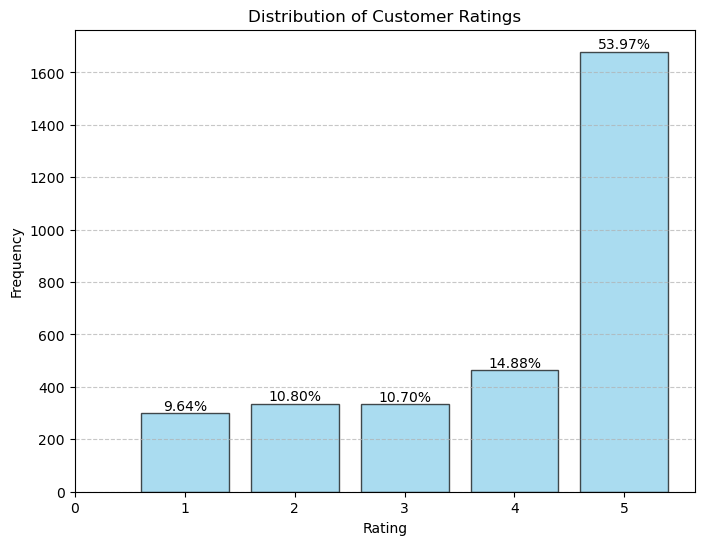

In [6]:
import matplotlib.pyplot as plt

# Plotting the bar plot with fractions displayed at the top
rating_counts = merged_df['Rating'].value_counts().sort_index()
total_counts = rating_counts.sum()

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(6))  # Since the ratings are from 0 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding fraction labels at the top of each bar
for bar in bars:
    height = bar.get_height()
    fraction = height / total_counts
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{fraction:.2%}', ha='center', va='bottom', fontsize=10)

plt.show()